In [1]:
# Import libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Import datasets

insurance_dataset =pd.read_csv("C:\\Users\\Ravi\\Desktop\\insurance.csv")

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Finding the datastructure of dataframe

insurance_dataset.shape

(1338, 7)

In [5]:
# Getting basic informations about the dataset

insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Finding null values in each columns of dataframes.

insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Getting statistical information about dataset

insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Ravi\AppData\Local\Temp\ipykernel_4596\3111364080.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


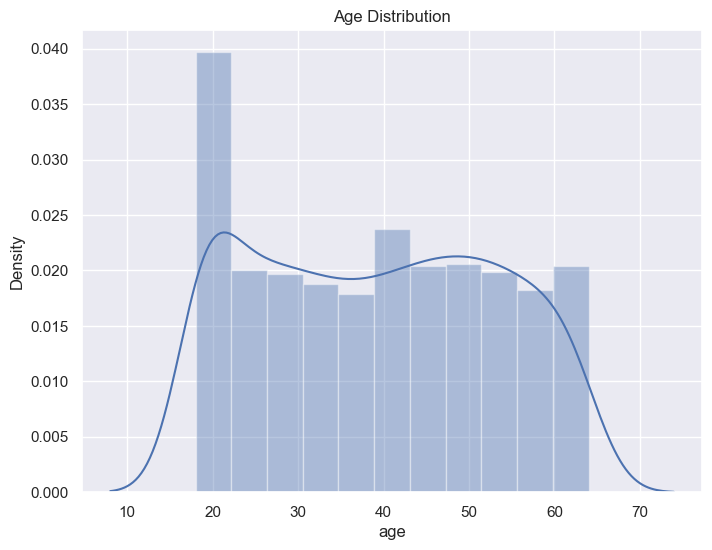

In [10]:
# Creating a histogram showing the distribution of age.

sns.set()
plt.figure(figsize=(8,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

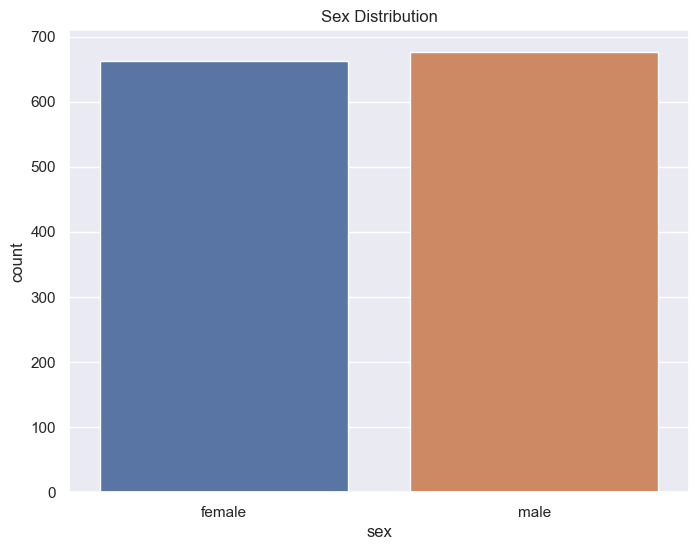

In [12]:
# Creating a Count plot showing distribution based on Gender.

plt.figure(figsize=(8,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [14]:
# Finding number of male and female.

insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

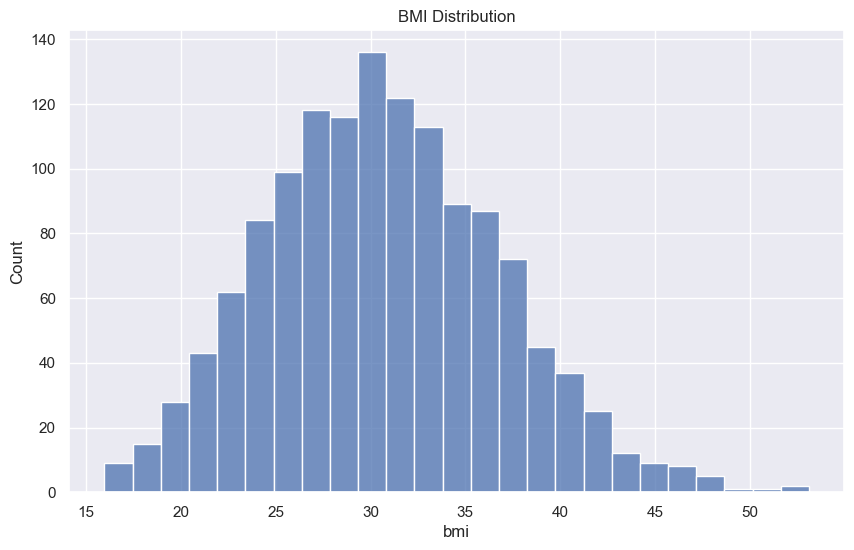

In [17]:
# Creating a histogram showing bmi distribution.

plt.figure(figsize=(10,6))
sns.histplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

# Normal BMI Range --> 18.5 to 24.9

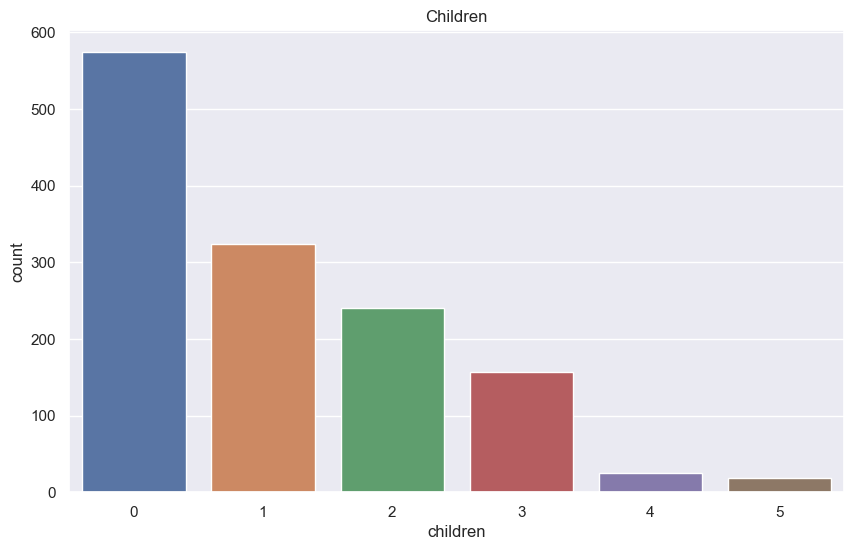

In [19]:
# Creating a count plot showing distribution of children.

plt.figure(figsize=(10,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [20]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

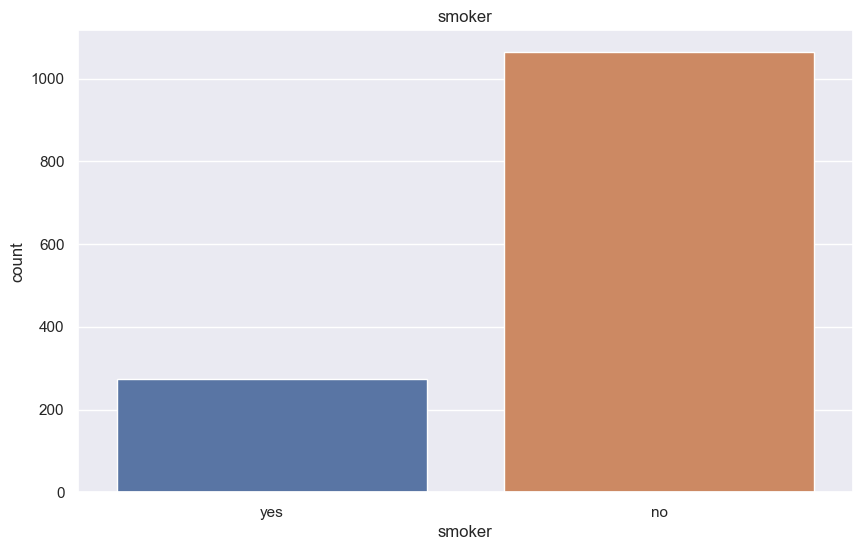

In [22]:
# Creating a count plot showing distribution of smokers.

plt.figure(figsize=(10,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [23]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

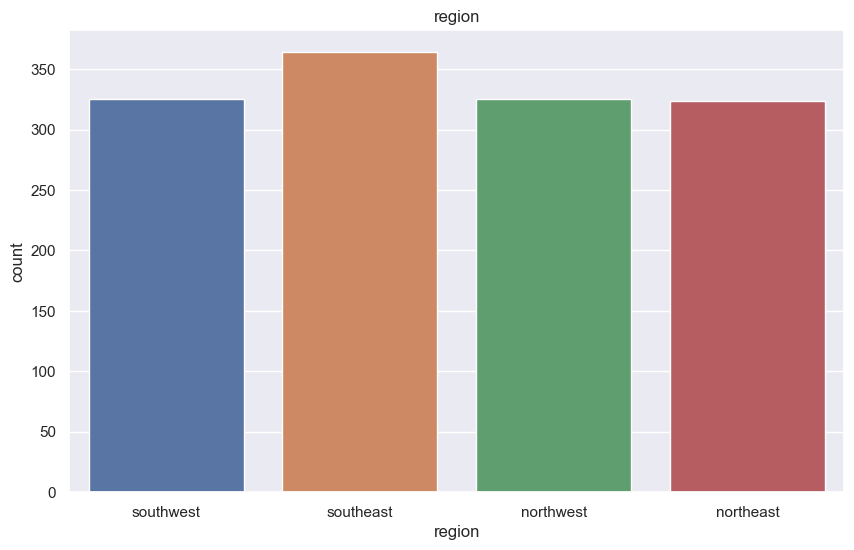

In [25]:
# Creating a count plot showing distribution by region.

plt.figure(figsize=(10,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [26]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

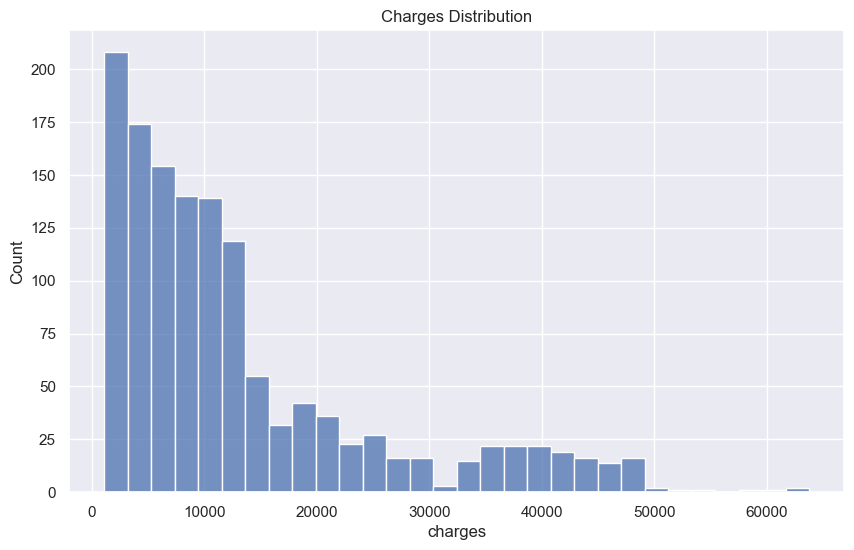

In [29]:
# Creating a histogram showing distribution of charge values.

plt.figure(figsize=(10,6))
sns.histplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-Processing

In [30]:
# Encoding sex column

insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

In [31]:
# Encoding 'smoker' column

insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

In [32]:
# Encoding 'region' column

insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [33]:
# Splitting the Features and Target

X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [34]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [35]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [36]:
# Splitting the data into Training data & Testing Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [38]:
# loading the Linear Regression model

regressor = LinearRegression()

In [39]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [40]:
# Prediction on training data

training_data_prediction =regressor.predict(X_train)

In [43]:
# R squared value

r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [44]:
# Prediction on test data

test_data_prediction =regressor.predict(X_test)

In [45]:
# R squared value

r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684076


In [55]:
# Building a Predictive System

input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)


print('The insurance cost is USD :', prediction[0])

The insurance cost is USD : 3760.080576496048


C:\Users\Ravi\ravi12\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
